## Predicting Developer Salaries

### Project Background
Africa’s Tech sector has become one of the fastest growing tech ecosystems in the world with tech being one of the fastest growing sectors in Africa. This has led to a rise in demand for jobs in the industry.
However, unlike other parts of the world, information on remuneration in these jobs remains hard to come by. Existing resources such as glassdoor and brighter monday have limited information on salaries in Africa.
Over the past few years, it has been observed that foreign companies enter the African Market, offering more competitive salaries compared to local companies resulting in mass movement of experienced developers into these new roles.
This project seeks to solve this problem by developing a platform that can predict developer salaries based on their personal information, and also, providing comparison between different incomes in different regions for similar roles.


### Stakeholders:
- Jobseekers
- Employers
- Recruitment agencies

### Business Understanding
Salary negotiation can be a critical stage in the job search process, and job seekers often encounter various challenges during this phase like lack of information on salary trends. This means that a jobseeker might spend valuable time researching industry salary trends. Some might not be so lucky as the information might be non existent.

As the Tech labour market becomes more competitive, offering the right salary for new and current employees is crucial for employers as it means keeping or losing a valued resource. Thus it is imperative for them to offer fair and competitive compensation that is benchmarked to their industry

Our project looks at coming up with salary prediction model to help both jobseekers and employers with the above challenges. We will focus on the tech industry (developers) and use data from stackoverflow's annual developer survey.

### Problem statement
Our solution to the problem of inadequate salary data for both employees and employers is to develop a salary prediction model, to estimate salaries based on relevant job specifications. The model will assist in making informed decisions related to compensation and provide valuable insights for both job seekers and employers.

The salary prediction model will enable job seekers to have a better understanding of the salary expectations associated with their qualifications and experience.

Employers can use the model to make informed decisions regarding fair compensation packages for new hires or salary adjustments for existing employees.

Job sites like linkedin, glassdoor, brigther monday can use this model for jobs displayed on the sites by quoting the estimated salaries


### Objectives

- The main objective of this project is to come up with a salary rediction model that will:
- Enable Jobseekers to ask for competitive salaries during contract negotiations.
- Assist employers in offering fair compensation to their employees.
- Assist Recruitment agencies offer accurate salary estimates to their clients.

These objectives will be achieved through the following specific objectives:
- To select the most important features in the dataset to be used in Salary prediction.
- To describe how features such as Proffessional experience and Education level affect Annual compensation.
- To build multiple regression models and identify the most suitable model to be used in the prediction.
- To deploy the model using streamlit as an online dashboard.

### Success Metrics

The metrics to be used to measure the success of the model are:
- Mean Absolute Error
- Root Mean Square Error
- Rsquared

An Rsquared  value of 75% or more will be considered a success, i.e the model explains more than 75% of the  variance in pay of the developers.

### Data Understanding
The data comes from [stakoverflow annual developer survey](https://insights.stackoverflow.com/survey/) for 2022. Each row shows the responses given by a developer. It has 73268 rows and  79 columns. The data has missing values, but no duplicate rows.

The target variable ConvertedCompYearly shows the annual salary for each developer.
The data contains responses from 180 countries.
Opportunities to clean the data and use PCA to reduce the number of columns



Load Libraries

In [1]:
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import category_encoders as ce

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

Load Data

In [3]:
def read_data(path):

    """A simple function to load data"""

    data = pd.read_csv(path)

    return data

original_df = pd.read_csv(r'c:\Users\user\Documents\capstone\survey_results_public.csv')
original_df.head(2)
df = original_df.copy()

#### Class for Understanding Dataset
Below we create a class to:
- give data dimensions
- display column info
- give descriptive stats on numerical columns
- check data types, duplicates & missing values

From the below outputs of the class:
- The Dataset has no duplicates
- Data has 6 numeric columns and 73 categorical columns
- 77 columns have missing values, ranging from 2% (`country` column) to 100% (`VCHostingProfessional use` & `VCHostingPersonal use` columns). We will deal with missing values in the data cleaning section

In [6]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("The Dataset has ",len( df.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numeric Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None

    # method to check duplicates

    def check_duplicates(self):

        duplicates = []

        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):

        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]

# create an instance of the class describer

describe_df = Describer(df)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()

The DataFrame has:
	* 73268 rows
	* 79 columns 

The Dataset has No Duplicates
The Dataset has  6 Numeric columns
and 73 Categorical columns
*******************
*******************
Numeric Columns: Index(['ResponseId', 'CompTotal', 'VCHostingPersonal use',
       'VCHostingProfessional use', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')
Categorical Coulumns: Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkW

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
LearnCodeCoursesCert,43879,0.598884
OfficeStackAsyncWantToWorkWith,41196,0.562265
Frequency_3,38753,0.528921
...,...,...
EdLevel,1697,0.023162
SOAccount,1696,0.023148
LearnCode,1688,0.023039
Employment,1559,0.021278


### Data Cleaning
The data cleaning process will entail the following:
- Renaming clumsily worded columns for easier understanding
- Dealing with missing data from the 77 columns
    - Drop columns with 100% missing data

#### Renaming Columns
When going through the data, we noticed some clumsily worded columns. To make the data easier to understand, we came up with new names. Below we code a function that will take in the new and old names as key-value pairs, then use these to rename the columns in the dataframe.

We have run the function below and confirmed renaming of a few columns e.g. columns 3 to 5

In [7]:

def rename(data):

    # import text doc with old and new col names

    cols = pd.read_csv(r'cols.txt', sep='\t')

    # create a dictionary with the cols txt

    cols_dict = dict(zip(cols['Old'], cols['New']))

    # rename cols in the dataframe
    
    df = data.rename(columns = cols_dict)

    return df

df = rename(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Cleaning Missing Data

In [6]:
describe_df.missing_values()

,Missing Values,Percentage %
VCHostingProfessional use,10582,1.000000
VCHostingPersonal use,10582,1.000000
Code_Certifications,6940,0.655831
Proj_Mgmt_WantToWorkWith,6082,0.574750
Knowledge_Silos,5657,0.534587
...,...,...
Learn_Code_Method,115,0.010868
SOAccount_Ownership,113,0.010679
Education_Level,111,0.010490
Employment_Status,103,0.009734


`VCHostingProfessional use` and `VCHostingPersonal use` columns have no data, hence have 100% missing values. We drop these 2 columns for this reason

In [8]:
def dropping_columns(data, columns):

    """A simple function to drop columns with missing values"""

    drop_column = data.drop(columns=columns, axis=1)

    return drop_column

columns_to_drop = ['VCHostingProfessional use', 'VCHostingPersonal use']

df = dropping_columns(df, columns_to_drop)
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
ProfessionalTech,38362,0.523585
Siloed_Teams,38295,0.522670
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


### Columns With Legitimately Missing Values
The column `Participation_PDS` allowed a developer to choose wether or not they would answer the subsequent 20 questions. This means that the missing values for these will be missing because they should.

In `Participation_PDS` we will replace NA with No, then in the subsequent PDS questions, replace NA with Not Answered

In [11]:

def fill_pds(data):

    """A simple function to replace NA in Participation_PDS with No"""

    data['Participation_PDS'] = data.Participation_PDS.fillna('No')

    return data

df = fill_pds(df)
df.Participation_PDS.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
def replace_na(data):

    """Function to clean cols 'Contributor_or_Manager':'Learning_Support'"""

    for index, row in data.iterrows():

        if row['Participation_PDS'] == 'No':

            data.loc[index, 'Contributor_or_Manager':'Learning_Support'] = 'Not Answered'

    return data

df = replace_na(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,NaN


In [13]:
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
...,...,...
Is_Involved_Onboarding,1381,0.018849
TimeAnswering,1178,0.016078
TimeSearching_Answers,1002,0.013676
Contributor_or_Manager,917,0.012516


After cleaning the legitimate missing columns above, we expected subsequent values to contain no missing data. However, on inspecting some 'Yes' values in  `Participation_PDS` we realised they also had some missing values in the subsequent columns. Below we clean these missing values by assigning them to 'Not Answered'

In [15]:
columns_range = ['Contributor_or_Manager', 'WorkExp', 'Extroverted', 'Siloed_Teams',
       'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource',
       'Recurring_Responses', 'Workflow_Interruptions',
       'External_Team_Assistance', 'External_Team_Interaction',
       'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
       'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding',
       'Employer_Learning_Resources', 'Learning_Support']

def replace_yesna(data, columns_range, valuefill):

    """A simple function to replace 'NA' with 'not answered' in the specified range of columns"""

    data[columns_range] = data[columns_range].fillna(valuefill)

    return data

df = replace_yesna(df, columns_range,'Not Answered')

df.TimeSearching_Answers.value_counts()

Not Answered                  37070
30-60 minutes a day           13652
15-30 minutes a day           10122
60-120 minutes a day           6371
Less than 15 minutes a day     3528
Over 120 minutes a day         2525
Name: TimeSearching_Answers, dtype: int64

In [12]:
len(describe_df.missing_values())

55

After cleaning these columns, we now have 55 columns with missing values

To replace the missing values of `SurveyLength` and `SurveyEase`, we reviewed the most common values in both columns. In the former, 'Appropriate in length' is 76% while in the latter, 'Easy' is 67%. Below we use these 2 values to fill missing values for the 2 columns

In [21]:

print("Survey Length \n",df.SurveyLength.value_counts(normalize=True))
print('**************************************************************')
print("Survey Ease \n", df.SurveyEase.value_counts(normalize=True))

Survey Length 
 Appropriate in length    0.764905
Too long                 0.205709
Too short                0.029385
Name: SurveyLength, dtype: float64
**************************************************************
Survey Ease 
 Easy                          0.679157
Neither easy nor difficult    0.306731
Difficult                     0.014112
Name: SurveyEase, dtype: float64


In [22]:
def len_eas(data):

    """Function to replace missing values of Survey Length and Survey Ease with Appropriate in Length and Easy Respectively"""

    data.SurveyLength.fillna('Appropriate in length', inplace=True)

    data.SurveyEase.fillna('Easy', inplace=True)

    return data

df = len_eas(df)

print(df.SurveyLength.isna().sum())
print(df.SurveyEase.isna().sum())

0
0


Great! No missing values on the Survey Length and Survey Ease columns 

Let's preview the remaining missing values within the dataframe 

In [16]:
print(len(describe_df.missing_values()))
describe_df.missing_values()

53


,Missing Values,Percentage %
Code_Certifications,6940,0.655831
Proj_Mgmt_WantToWorkWith,6082,0.574750
MiscTechWantToWorkWith,5204,0.491778
PlatformWantToWorkWith,4795,0.453128
Annual_Salary,4781,0.451805
Total_Salary,4743,0.448214
WebframeWantToWorkWith,4024,0.380268
MiscTechHaveWorkedWith,3824,0.361368
Proj_Mgmt_HVWorkedWith,3788,0.357966
Salary_Frequency,3786,0.357777


Below we select rows with 20% - 70% missing values in all columns. Looking at the sample distribution of missing values, we will drop all rows with more than 50% missing values as they quality of their responses are doubful

In [71]:
def missing_vals(data):

    """ A simple function to calculate 20% - 70% of col missing values"""
    
    # Calculate the percentage of missing values for each row

    missing_percentages = data.isnull().mean(axis=1) * 100

    # Select rows with 20% missing values

    rows_20_percent_missing = data[missing_percentages >= 20]

    # Select rows with 50% missing values

    rows_50_percent_missing = data[missing_percentages >= 50]

    # Select rows with 60% missing values

    rows_60_percent_missing = data[missing_percentages >= 60]

    # Select rows with 70% missing values
    
    rows_70_percent_missing = data[missing_percentages >= 70]

    out = print("20% missing: ", len(rows_20_percent_missing), "50% missing: ", len(rows_50_percent_missing),
                "60% missing: ", len(rows_60_percent_missing), "70% missing: ", len(rows_70_percent_missing))
    return out

missing_vals(df)

20% missing:  0 50% missing:  0 60% missing:  0 70% missing:  0


In [26]:
def drop_50(data):

    """A simple function to drop rows with more than 50% missing values"""

    threshold = len(data.columns) * 0.5 
     
    data = data.dropna(thresh=threshold)

    return data

df = drop_50(df)

Let's check the shape of the dataframe after dropping the rows 

In [25]:
def check_shape(data):

    """A simple function to preview the shape of the dataset"""

    shape = data.shape

    return shape

check_shape(df)

(71711, 77)

In [28]:
cols = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
Annual_Salary
Total_Salary
PlatformWantToWorkWith
Salary_Frequency
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
OrgSize
Currency
Pro_Experience
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
SOA_ParticipationFreq
Outofwork_Coding
Remote_vs_Onsite
DatabaseHaveWorkedWith
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSysProfessional use
MentalHealth
Sexuality
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
Ethnicity
Trans
NEWCollabToolsHaveWorkedWith
Gender
Age
OpSysPersonal use
SOVisitFreq
LanguageHaveWorkedWith
Blockchain_Sentiment
Coding_Experience
New_Stack_Overfl_Sites
VersionControlSystem
Belong_SO_Comm
Education_Level
SOAccount_Ownership
Learn_Code_Method
Employment_Status
"""

def listcols(cols):

    """Function to split cols variable into a list"""

    cols_list = cols.split('\n')
    cols_list = [col.strip() for col in cols_list if col.strip()]

    return cols_list

cols_list = listcols(cols)
print(cols_list)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'Annual_Salary', 'Total_Salary', 'PlatformWantToWorkWith', 'Salary_Frequency', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'OrgSize', 'Currency', 'Pro_Experience', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'SOA_ParticipationFreq', 'Outofwork_Coding', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'MentalHealth', 'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity', 'Trans', 'NEWCollabToolsHaveWorkedWith', 'Gender', 'Age', 'OpSysPersonal use', 'SOVisitFreq', 'LanguageHaveWorkedWith', 'Blockchain_Sentiment', 'Coding_Experience', 'New_Stack_Overfl_Sites', 'VersionControlS

We select the columns with missing values, then below we run a profiles report to inspect the properties of each columns, and decide on how to deal with the missing values.

In [31]:
#def profile_report(data, cols_list):

    #"""A simple function to display the profile report for cols"""

    #missing_cols = data[cols_list]

    #profile = ProfileReport(missing_cols, title = "Profiling Report", minimal = True)

    #return profile

#profile_report(df, cols_list)

#### Drop `Total_Salary`, `Salary_Frequency` and `Currency` Columns
These columns are used to compute `Annual_Salary` column, which is our target variable. Thus they should not form part of the feature variables

In [32]:
# list of columns to 

columns_to_drop1 = ['Total_Salary', 'Salary_Frequency', 'Currency']

# calling function to drop columns

df = dropping_columns(df, columns_to_drop1)

# previewing shape of the dataframe

check_shape(df)

(71711, 74)

In [33]:
def confirm(data, columns_to_drop1):

    """A simple function to check if cols have been dropped"""

    for i in columns_to_drop1:

        print(i in data.columns)
    
confirm(df, columns_to_drop1)

False
False
False


#### Handle Missing Values with None of the Above
The columns below have valid missing values because the response options did not allow the developers specify the responses that did not apply to them. For example in the column `Code_Certifications` asks developers the online resources they used to learn coding. However, it is possible that some people didn't use these resources because they learned coding in the degree courses for example. Since this option misses from the responses, those develpers opted to skip for this reason. The same logic applies to the remaining columns selected below

In [34]:
cols1 = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
PlatformWantToWorkWith
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
Outofwork_Coding
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
MentalHealth
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
NEWCollabToolsHaveWorkedWith
New_Stack_Overfl_Sites
OrgSize
Remote_vs_Onsite
DatabaseHaveWorkedWith"""

cols_list1 = listcols(cols1)

print(cols_list1)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'MentalHealth', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'NEWCollabToolsHaveWorkedWith', 'New_Stack_Overfl_Sites', 'OrgSize', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith']


In [35]:
# use function to fill in list of columns with None

df = replace_yesna(df, cols_list1,'None of the Above')

df.Code_Certifications.value_counts()

None of the Above                                        42323
Udemy                                                     5643
Other                                                     2593
Coursera;Udemy                                            1893
Udemy;Codecademy                                          1472
                                                         ...  
Coursera;Codecademy;edX;Udacity;Skillsoft                    1
Coursera;Other;Skillsoft                                     1
Udemy;Codecademy;Pluralsight;edX;Other;Skillsoft             1
Coursera;Udemy;Codecademy;Pluralsight;Other;Skillsoft        1
Pluralsight;edX;Other;Skillsoft                              1
Name: Code_Certifications, Length: 207, dtype: int64

#### Missing Values filled With One of the Response Options
For this set of columns, we have identified a criteria to fill in the missing values based on the response distribution. For example:
- demographic variable missing values are filled with preferred not to say option due to sensitivity
- some other variables filled with the most common response option based on domain knowledge e.g operating systems used
- while some filled with 'not sure/can't rememember'- e.g. blockchain sentiments

In [36]:
def rename_values(df, column):

    """A simple function to rename values in the 'Experience' column"""

    df[column] = df[column].replace({'Less than 1 year': 0.5, 'More than 50 years': 50})

    return df

# Call the function to rename values in the 'Pro_Experience' column

df = rename_values(df, 'Pro_Experience')

# Call the function to rename values in the 'Coding_Experience' column

df = rename_values(df, 'Coding_Experience')


In [37]:
# cols to fill with 'Prefer not to say'

demo = ['Sexuality', 'Ethnicity', 'Trans', 'Gender']

df = replace_yesna(df, demo,'Prefer not to say')

# cols to fill with 'I prefer not to say'

df = replace_yesna(df, 'Employment_Status','I prefer not to say')

# fill Age with '25-34 years old'

df = replace_yesna(df, 'Age','25-34 years old')

# fill 'OpSysPersonal use' & 'OpSysProfessional use' with 'Windows'

ops = ['OpSysPersonal_use', 'OpSysProfessional_use']

df = replace_yesna(df, ops,'Windows')

# fill  SOVisitFreq with 'Daily or almost daily'

df = replace_yesna(df, 'SOVisitFreq','Daily or almost daily')

# fill Blockchain_Sentiment with 'Unsure'

df = replace_yesna(df, 'Blockchain_Sentiment','Unsure')

# fill Coding_Experience, Pro_Experience with median

df['Coding_Experience'].fillna(df['Coding_Experience'].median(), inplace=True)

df['Pro_Experience'].fillna(df['Pro_Experience'].median(), inplace=True)

# fill VersionControlSystem with 'I don't use one'

df = replace_yesna(df, 'VersionControlSystem',"I don't use one")

# fill Belong_SO_Comm with 'Not sure'

df = replace_yesna(df, 'Belong_SO_Comm',"Not sure")

# fill Education_Level with 'Something else'

df = replace_yesna(df, 'Education_Level',"Something else")

# fill SOAccount_Ownership with Not sure/can't remember

df = replace_yesna(df, 'SOAccount_Ownership',"Not sure/can't remember")

# fill Learn_Code_Method with 'I don't use one'

df = replace_yesna(df, 'Learn_Code_Method',"I don't use one")

# fill SOA_ParticipationFreq with 'Less than once per month or monthly'

df = replace_yesna(df, 'SOA_ParticipationFreq',"Less than once per month or monthly")

# fill LanguageHaveWorkedWith with 'Bash/Shell'

df = replace_yesna(df, 'LanguageHaveWorkedWith',"Bash/Shell")


In [38]:
# check for remaining missing values

describe_df.missing_values()

,Missing Values,Percentage %
Annual_Salary,33640,0.469105


#### Handling Multiple Response Values
From the profiles analysis, the columns below were discovered to contain multiple and fragmented respones for each row, which masked the true distribution across categories due to unique combination of values contained in each row. To untangle the values and have unique responses, we will select the first mentioned response. Our rationale is that this responses for e.g in `Code_Certifications` represents the online resource that was used most often, was most impactful, or most memorable to the developer. The same arguement holds for the other columns.

In [39]:
def extract_first_value_from_columns(df, columns):

    """A simple function to extract first mentions"""

    first_values = {}

    for col in columns:

        first_values[col] = df[col].apply(lambda x: x.split(";")[0].strip() if isinstance(x, str) and ";" in x else x)

    return pd.DataFrame(first_values)

# columns to be cleaned

colslist = ['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith',
'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith',
'PlatformHaveWorkedWith', 'Learn_Code_Source', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith',
'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DatabaseHaveWorkedWith', 'DevType',
'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional_use', 'MentalHealth',
'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity',
'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal_use', 'LanguageHaveWorkedWith', 'New_Stack_Overfl_Sites',
'VersionControlSystem', 'Learn_Code_Method', 'Employment_Status', 'Gender', 'ProfessionalTech']

# data with cols of first mentions

zer = extract_first_value_from_columns(df, colslist)

zer.Code_Certifications.value_counts(normalize=True)

None of the Above    0.590188
Udemy                0.174701
Coursera             0.143088
Other                0.036285
Codecademy           0.026523
Pluralsight          0.019899
edX                  0.005104
Udacity              0.003695
Skillsoft            0.000516
Name: Code_Certifications, dtype: float64

In [29]:
# replace the colslist in df with cleaned data # f rom zer dataframe

df[colslist] = zer

# confirm that values display as expected

df.Code_Certifications.value_counts(normalize=True)

None of the Above    0.652614
Udemy                0.146318
Coursera             0.121042
Other                0.032526
Codecademy           0.023846
Pluralsight          0.016597
edX                  0.003720
Udacity              0.003052
Skillsoft            0.000286
Name: Code_Certifications, dtype: float64

#### Cleaning the `Annual_Salary` Column
To clean this column's missing values, we will look at:
- the employment of each respondent. For unemployed and students without salary values, we will replace missing values with 0 as it is unrealistic to impute values for this group
- the salary distribution at a regional level (e.g. salaries in Africa would differ from Europe), then use the appropriate median value


In [40]:
# for those who don't work and have no salary
# fill missing salary with 0

nonwork = ['Student, full-time', 'Student, part-time',
       'Not employed, but looking for work',
 'Not employed, and not looking for work',
       'Retired', 'I prefer not to say']

df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'].isna()), 'Annual_Salary'] = 0

# confirm that the replace has worked

print(df.Annual_Salary.value_counts().head(), '\n')

# confirm that other null values still exist

print('remaining missing values: ', df.Annual_Salary.isna().sum())

0.0         11245
150000.0      393
200000.0      362
120000.0      341
63986.0       304
Name: Annual_Salary, dtype: int64 

remaining missing values:  22395


In [41]:
# countries grouped into continents

continents = {
    'Asia': ['Israel', 'Hong Kong (S.A.R.)', 'India', 'China', 'Singapore', 'Iraq',
             'Philippines', 'Iran, Islamic Republic of...', 'Indonesia', 'Afghanistan',
             'Viet Nam', 'South Korea', 'Taiwan', 'Japan', 'Thailand', 'Bangladesh',
             'Nepal', 'United Arab Emirates', 'Pakistan', 'Sri Lanka', 'Azerbaijan',
             'Uzbekistan', 'Kazakhstan', 'North Korea', 'Timor-Leste', 'Brunei Darussalam',
             'Oman', 'Saudi Arabia', 'Maldives', 'Jordan', 'Bahrain', 'Republic of Korea',
            'Lebanon', 'Malaysia', "Lao People's Democratic Republic", 'Syrian Arab Republic',
            'Qatar', 'Kyrgyzstan', 'Cambodia', 'Yemen', 'Mongolia', 'Tajikistan', 'Myanmar',
            'Kuwait', 'Turkmenistan', 'Palestine', 'Bhutan'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands', 'Papua New Guinea',
                'Palau'],
    'North America': ['Canada', 'United States of America', 'Mexico', 'Dominican Republic',
                     'Costa Rica', 'Nicaragua', 'Belize', 'Guatemala', 'El Salvador',
                     'Jamaica', 'Cuba', 'Panama', 'Bahamas', 'Barbados', 'Antigua and Barbuda',
                      'Haiti', 'Saint Lucia', 'Saint Kitts and Nevis'],
    'Europe': ['Croatia', 'Netherlands', 'Czech Republic', 'Sweden', 'Denmark',
               'Finland', 'United Kingdom of Great Britain and Northern Ireland',
               'Austria', 'France', 'Portugal', 'Belgium', 'Ireland', 'Iceland',
               'Montenegro', 'Germany', 'Belarus', 'Switzerland', 'Poland',
               'Ukraine', 'Russia', 'Serbia', 'Luxembourg', 'Spain', 'Norway',
               'Romania', 'Italy', 'Turkey', 'Greece', 'Hungary', 'Malta',
               'Estonia', 'Slovenia', 'Bosnia and Herzegovina', 'Bulgaria',
               'Georgia', 'Latvia', 'Lithuania', 'Moldova', 'Macedonia (FYROM)', 'Armenia',
               'Monaco', 'Slovakia', 'Cyprus', 'Russian Federation',
              'The former Yugoslav Republic of Macedonia', 'Andorra', 'Nomadic', 'Albania',
              'Republic of Moldova', 'Kosovo', 'Isle of Man', 'San Marino'],
    'Africa': ['Madagascar', 'South Africa', 'Swaziland', 'Mali', 'Egypt', 'Nigeria',
               'Tunisia', 'Cameroon', 'Ethiopia', 'Ghana', 'Rwanda', 'Senegal',
               'Chad', 'Benin', 'Angola', 'Namibia', 'Malawi', 'Sierra Leone',
               'Zimbabwe', 'Mauritius', 'Morocco', 'Kenya', 'Botswana', 'Liberia', 'Lesotho',
               'Guinea', 'Gabon', 'Seychelles', 'Algeria', 'Zambia', 'Uganda',
              'United Republic of Tanzania', 'Niger', 'Cape Verde', 'Libyan Arab Jamahiriya',
              'Togo', 'Sudan', 'Democratic Republic of the Congo', "Côte d'Ivoire",
              'Congo, Republic of the...', 'Somalia', 'Mozambique', 'Mauritania',
              'Burkina Faso', 'Gambia', 'Djibouti'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru',
                      'Venezuela, Bolivarian Republic of...', 'Bolivia', 'Paraguay',
                      'Ecuador', 'Uruguay', 'Honduras', 'Trinidad and Tobago', 'Suriname',
                     'Guyana']
}

In [42]:
# Create the 'continents' column by mapping the 'countries' column to the continents dictionary

df['continents'] = df['Country'].map({country: continent for continent, countries in continents.items()
                                        for country in countries})

In [43]:
# get median salary for each continent

salo = df[df.Annual_Salary > 0].groupby('continents')['Annual_Salary'].median()

salo

continents
Africa            18126.0
Asia              23215.0
Europe            59720.0
North America    132000.0
Oceania           92002.0
South America     27008.5
Name: Annual_Salary, dtype: float64

In [44]:
continent_mapping = {
    'Africa': 18126.0,
    'Asia': 23215.0,
    'Europe': 59720.0,
    'North America': 132000.0,
    'Oceania': 92002.0,
    'South America': 27008.5}

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

df.Annual_Salary.isna().sum()

0

In [45]:
# preview salary columnn after handling missing values

df[['continents', 'Country', 'Annual_Salary']].head()

,continents,Country,Annual_Salary
1,North America,Canada,132000.0
2,Europe,United Kingdom of Great Britain and Northern I...,40205.0
3,Asia,Israel,215232.0
4,North America,United States of America,132000.0
5,Europe,Germany,0.0


In [46]:
# confirm no more missing values

describe_df.missing_values()

There Are No Missing Values


### Handling Nonsensical Values of Annual_Salary
On further investigation of target column, we realise that some respondents entered nonsensical values like USD 1 as their Annual_Salary. These need to be dealt with.

We also realise that the target variable is binomially distributed. Below we come up with a few categories that will help us to bin the salary values to specific categories

In [49]:
# inspect salary values between USD 1 and USD 4999

nonsense_salary = df[(df['Annual_Salary'] != 0) & (df['Annual_Salary'] <= 5000)][['Annual_Salary', 'Employment_Status', 'Country', 'Pro_Experience', 'continents']].sort_values(
    by='Annual_Salary')

nonsense_salary.head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time;Independent contractor, fr...",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time;Independent contractor, fr...",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


In [50]:
df.Employment_Status.value_counts()

Employed, full-time                                                                                                               42945
Student, full-time                                                                                                                 6745
Independent contractor, freelancer, or self-employed                                                                               4976
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           3486
Not employed, but looking for work                                                                                                 1829
                                                                                                                                  ...  
Employed, full-time;Student, full-time;Student, part-time;Not employed, but looking for work;Employed, part-time                      1
Employed, full-time;Student, full-time;Not emplo

In [51]:
# replace nonsense salary for students, retired, no work

df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = 0

In [52]:
# inspect salary values between USD 1 and USD 4999

nonsense_salary.head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time;Independent contractor, fr...",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time;Independent contractor, fr...",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


In [53]:
work = ['Employed, full-time', 'Independent contractor, freelancer, or self-employed', 'Employed, part-time']

# replace workers with nonsense salary with null

df.loc[(df['Employment_Status'].isin(work)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = np.nan

In [54]:
# replace nonsense salary for workers

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

In [55]:
# confirm no missing values

print(describe_df.missing_values())

# confirm nonsense df returns empty df

nonsense_salary.head(400)

There Are No Missing Values
None


,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time;Independent contractor, fr...",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time;Independent contractor, fr...",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


# Outliers
We have 1 numerical column Annual Salary. Below codes are checking for outliers
* We have  455 outliers , the lowest Outlier in salary is : 1828416.0, the highest Outlier in salary is  : 50000000.0, we also have 0 salary values which are the highest in count.
* Considering this is real world data we have log transformed the values and for the 0 values we have added a constant of 0.00001 to handle 0 values

In [44]:
df.Annual_Salary.value_counts()

0.0         2152
59720.0     1175
23215.0      921
132000.0     408
27008.5       74
            ... 
651312.0       1
116556.0       1
60228.0        1
6012.0         1
38924.0        1
Name: Annual_Salary, Length: 2334, dtype: int64

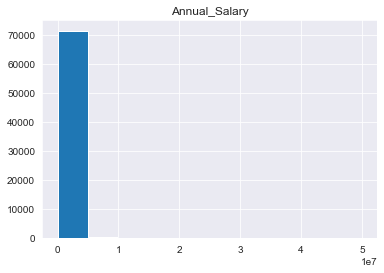

In [56]:
# Annual salary distribution

df.hist('Annual_Salary')

plt.show()

Below we are trying to see who the majority of 0 are

In [57]:
filtered_data = df[df['Annual_Salary'] == 0]
print(filtered_data.shape[0])
filtered_data.head(3)

11250


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
5,6,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",None of the Above,None of the Above,15,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
6,7,I code primarily as a hobby,"Student, part-time",None of the Above,None of the Above,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,None of the Above,3,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia
7,8,I am a developer by profession,"Not employed, but looking for work",None of the Above,None of the Above,Some college/university study without earning ...,Online Courses or Certification,None of the Above,Coursera;Udemy,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia


In [58]:
avedf = df[(df["Employment_Status"] == "Student, full-time") | (df["Employment_Status"] == "Student, part-time") &
           (df["Annual_Salary"]!= 0.0)]

avedf.Annual_Salary.value_counts()

0.0    6745
Name: Annual_Salary, dtype: int64

In [59]:
filtered_data.groupby('continents').Employment_Status.value_counts()

continents     Employment_Status                     
Africa         Student, full-time                         361
               Not employed, but looking for work         253
               Student, part-time                          66
               Not employed, and not looking for work      31
               I prefer not to say                         26
               Retired                                      2
Asia           Student, full-time                        1915
               Not employed, but looking for work         583
               Student, part-time                         432
               I prefer not to say                        190
               Not employed, and not looking for work     168
               Retired                                     20
Europe         Student, full-time                        2909
               Not employed, but looking for work         512
               Student, part-time                         380
               N

In [60]:
filtered_data.continents.value_counts()

Europe           4435
Asia             3308
North America    2123
Africa            739
South America     360
Oceania           285
Name: continents, dtype: int64

In [61]:
df.continents.value_counts()

Europe           31838
North America    16976
Asia             14577
South America     3755
Africa            2657
Oceania           1908
Name: continents, dtype: int64

In [62]:
def check_outliers(data):

    """A simple function to check for outliers using Z-score"""
    
    series_num = data["Annual_Salary"]
    mean = np.mean(series_num)
    std = np.std(series_num)
    threshold = 3
    outliers = data[np.abs((series_num - mean) / std) > threshold]
    return outliers

outliers = check_outliers(df)

print("The Number of Outliers in the 'Annual_Salary' Column:", len(outliers))
print("Outliers:")
outliers.head(2)

The Number of Outliers in the 'Annual_Salary' Column: 454
Outliers:


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
117,118,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media;On the job training,None of the Above,None of the Above,32,...,15-30 minutes a day,Very short,DevOps function;Microservices;Continuous integ...,Yes,No,Yes,Appropriate in length,Easy,6000000.0,North America
201,202,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;edX,9,...,Less than 15 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,44790396.0,Europe


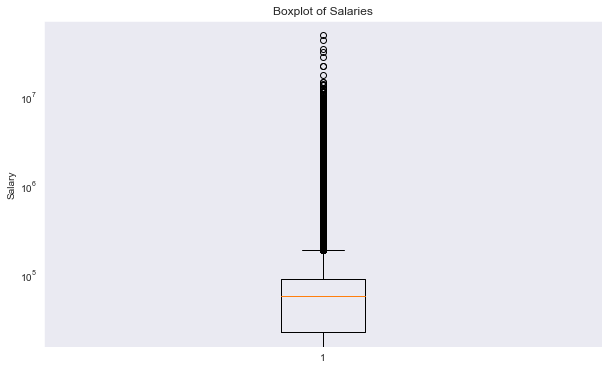

In [63]:
# boxplot to check outliers

plt.figure(figsize=(10, 6))
plt.boxplot(df['Annual_Salary'])
plt.ylabel('Salary')
plt.yscale('log')
plt.title('Boxplot of Salaries')
plt.show()

In [64]:
# print summary of above

print("We have", len(outliers))
print("The lowest Outlier in salary is :", outliers.Annual_Salary.min())
print("The highest Outlier in salary is  :", outliers.Annual_Salary.max())

We have 454
The lowest Outlier in salary is : 1842804.0
The highest Outlier in salary is  : 50000000.0


### Exploratory Data Analysis

We will explore a few varibales below to help us better understand our data:
- **Developer demographics** : continent, years of experience - work, age, gender, coding, education level, , where learned coding, remote vs onsite
- **Developer tools**: Language worked with, database worked with, cloud platforms worked with, version control, operating system
- **Annual_Salary** - histogram, boxplot. salary by continent, by educational level, years of experience

#### Developer Distribution by Continent
Most of the data was gathered from developers in Europe, North America and Asia.

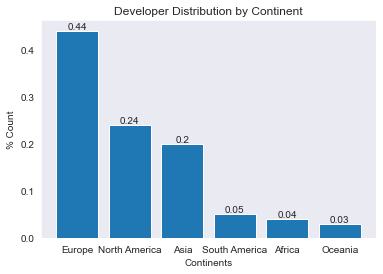

In [68]:
# Calculate relative frequency of each continent in the DataFrame

con = round(df.continents.value_counts(normalize=True), 2)

# Create a bar plot using the continent frequencies

plt.bar(con.index, con.values)

# Set the title of the plot

plt.title('Developer Distribution by Continent')

# Add text labels to each bar to display the corresponding percentage

for i, v in enumerate(con.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set labels for the x and y axes

plt.xlabel('Continents')
plt.ylabel('% Count')

# Display the plot

plt.show()


#### Years of Experience : Professionnal & Coding

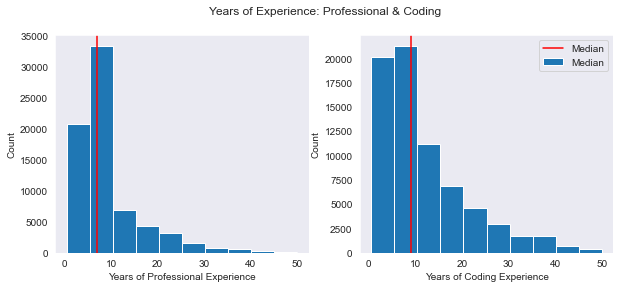

In [70]:
# Convert columns from 'object' to 'float' type

df['Pro_Experience'] = df.Pro_Experience.astype('float')
df['Coding_Experience'] = df.Coding_Experience.astype('float')

# Create subplots with two columns and set the figure size

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Set the overall title of the figure

fig.suptitle('Years of Experience: Professional & Coding')

# Plot the histogram of Professional Experience

axes[0].hist(df.Pro_Experience)

# Add a vertical line for the median

axes[0].axvline(df.Pro_Experience.median(), c='r')  

axes[0].set_xlabel('Years of Professional Experience')
axes[0].set_ylabel('Count')

# Plot the histogram of Coding Experience

axes[1].hist(df.Coding_Experience)

# Add a vertical line for the median

axes[1].axvline(df.Coding_Experience.median(), c='r')  
axes[1].set_xlabel('Years of Coding Experience')
axes[1].set_ylabel('Count')

# Add a legend for the median lines

plt.legend(['Median', 'Median'])

# Display the plot

plt.show()


#### Age and Gender Distribution

In [ ]:
# List of gender categories for y-axis tick labels

genl = ['In your own words:', 'LBGTQIA', 'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

# Count the occurrences of each age category sorting them in ascending order

agedf = df.Age.value_counts().sort_values(ascending=True)

# Count the occurrences of each gender category and sort them in ascending order
genddf = df.Gender.value_counts().sort_values(ascending=True)

# Create subplots with two columns and set the figure size
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

# Set the overall title of the figure
fig.suptitle('Age & Gender')

# Plot the horizontal bar chart for age distribution
axes[0].barh(agedf.index, agedf.values)
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Count')

# Plot the horizontal bar chart for gender distribution
axes[1].barh(genddf.index, genddf.values)
axes[1].set_ylabel('Gender')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(genl)))
axes[1].set_yticklabels(genl)



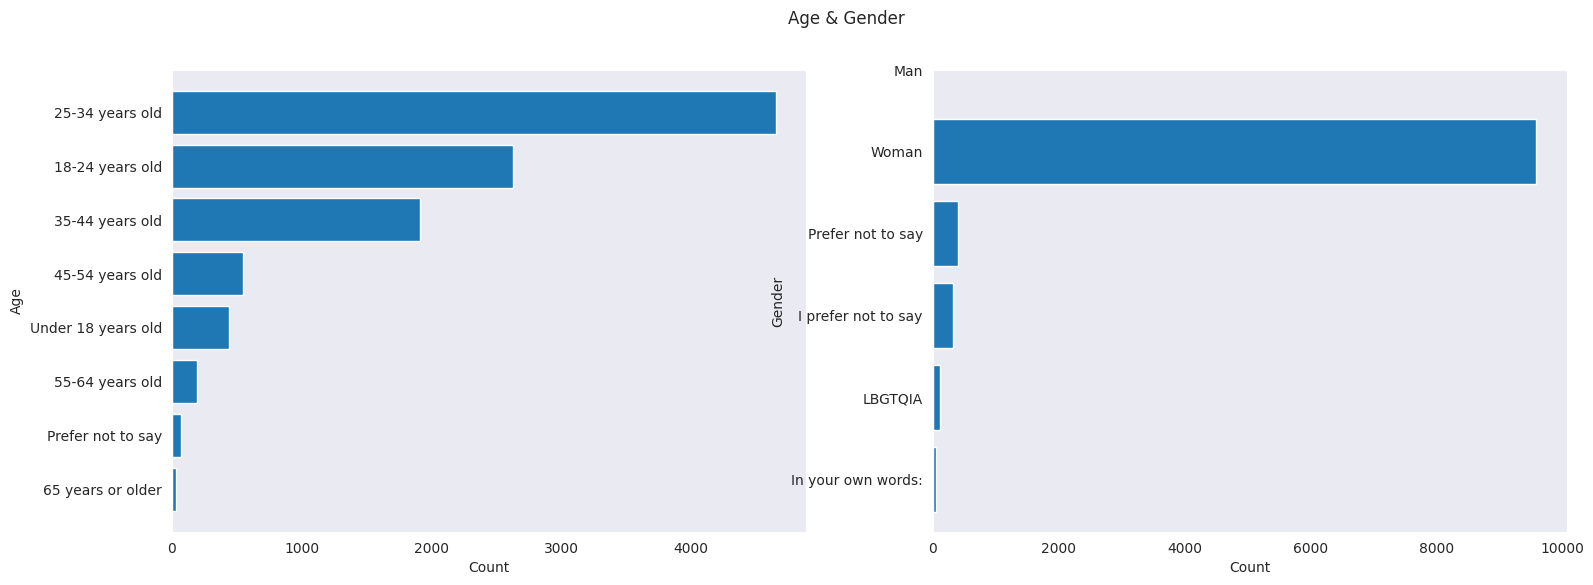

In [56]:
genl = ['In your own words:',
       'LBGTQIA',
       'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

#
agedf = df.Age.value_counts().sort_values(ascending=True)
genddf = df.Gender.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(18,6))

fig.suptitle('Age & Gender')
axes[0].barh(agedf.index, agedf.values)
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Count')
axes[1].barh(genddf.index, genddf.values)
axes[1].set_ylabel('Gender')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(genl)))
axes[1].set_yticklabels(genl);


#### Source of Coding Skills

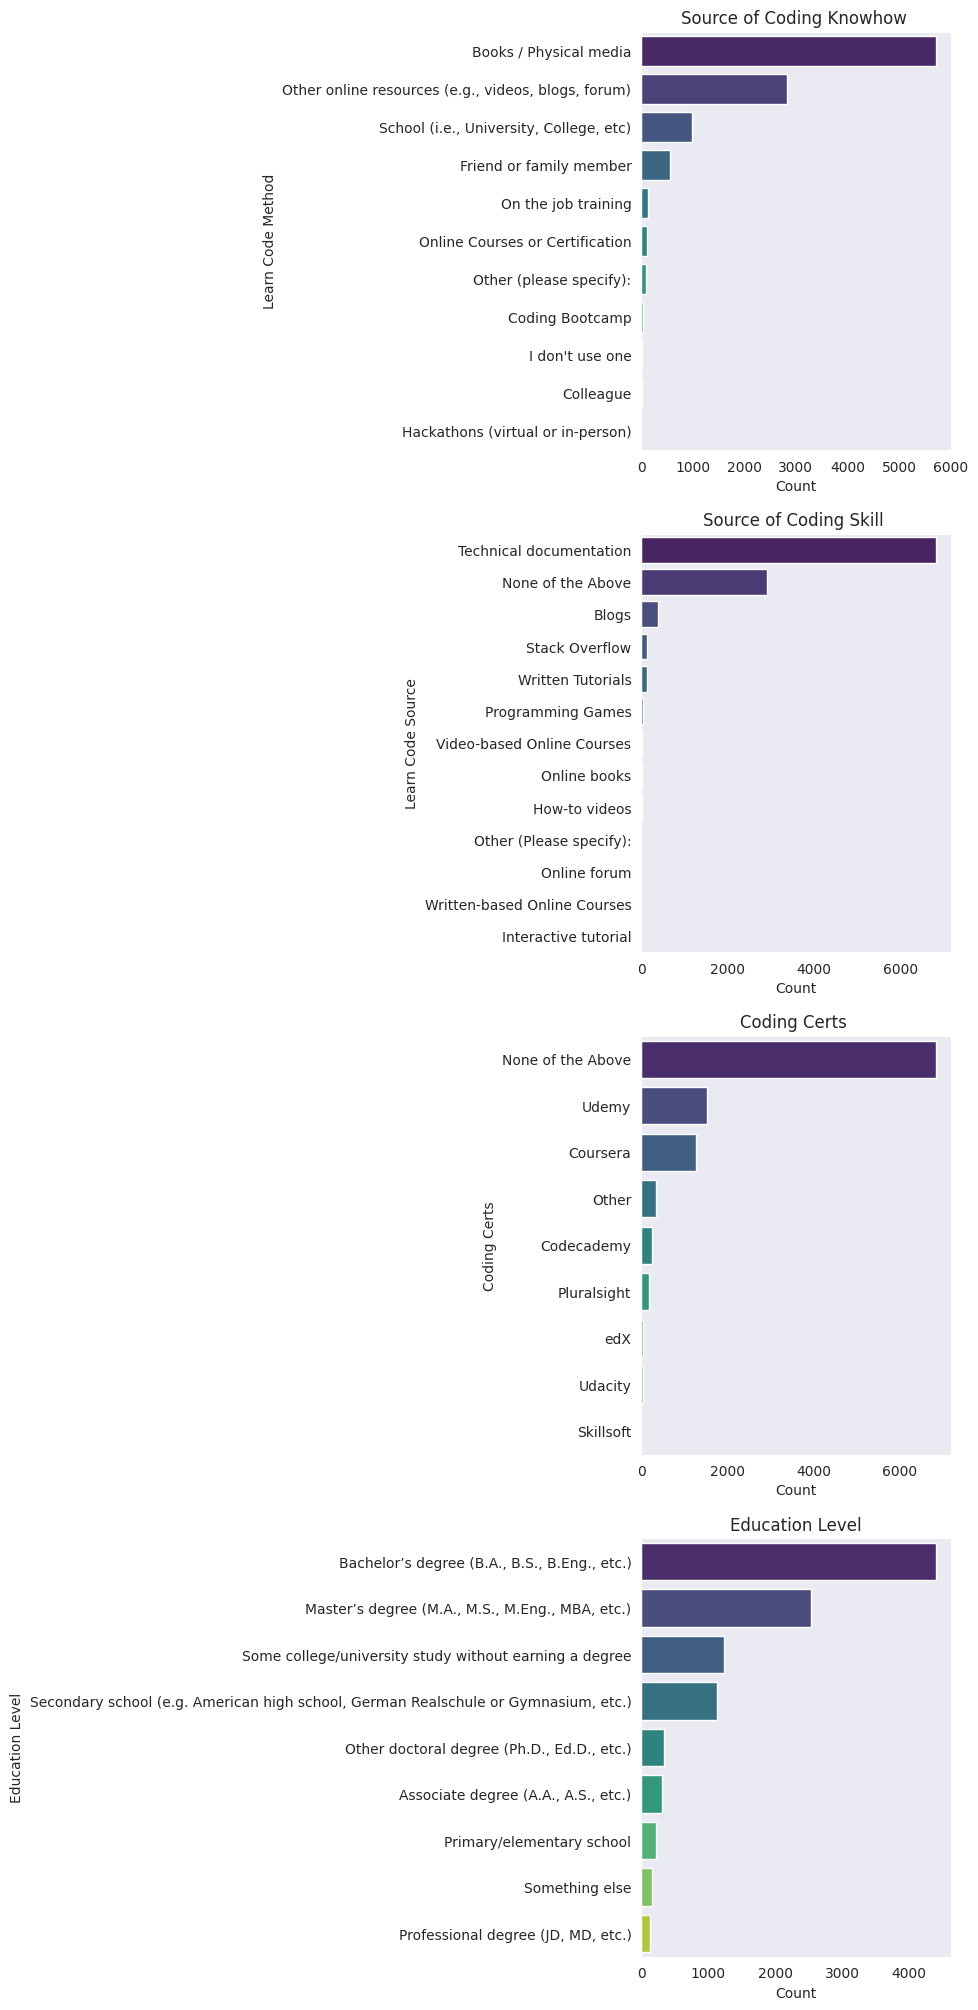

<Figure size 1000x600 with 0 Axes>

In [57]:
fig, axes = plt.subplots(nrows=4, figsize=(4,25))
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Learn_Code_Method', order=df['Learn_Code_Method'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_ylabel('Learn Code Method')
axes[0].set_xlabel('Count')
axes[0].set_title('Source of Coding Knowhow ')

sns.countplot(data=df, y='Learn_Code_Source', order=df['Learn_Code_Source'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_ylabel('Learn Code Source')
axes[1].set_xlabel('Count')
axes[1].set_title('Source of Coding Skill ')

sns.countplot(data=df, y='Code_Certifications', order=df['Code_Certifications'].value_counts().index, palette='viridis', ax=axes[2])
axes[2].set_ylabel('Coding Certs')
axes[2].set_xlabel('Count')
axes[2].set_title('Coding Certs ')

sns.countplot(data=df, y='Education_Level', order=df['Education_Level'].value_counts().index, palette='viridis', ax=axes[3])
axes[3].set_ylabel('Education Level')
axes[3].set_xlabel('Count')
axes[3].set_title('Education Level');

#### Employment Status & Work Style


In [58]:
empl = ['Retired', 'I prefer not to say',
       'Not employed, not searching', 'Employed, part-time',
       'Not employed, searching', 'Student, part-time',
       'consultant/freelance',
       'Student, full-time', 'Employed, full-time']

wkstlls = ['Full in-person', 'None',
       'Hybrid', 'Fully remote']

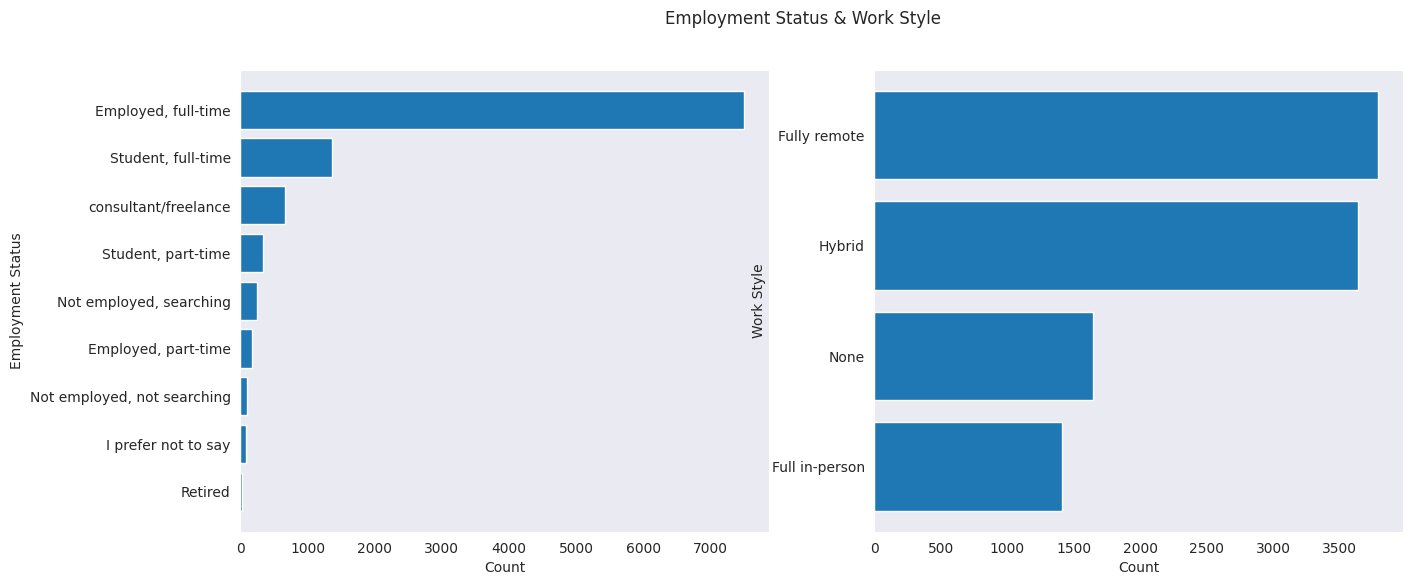

In [59]:
emp = df.Employment_Status.value_counts().sort_values(ascending=True)
wkstl = df.Remote_vs_Onsite.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(15,6))

fig.suptitle('Employment Status & Work Style')
axes[0].barh(emp.index, emp.values)
axes[0].set_ylabel('Employment Status')
axes[0].set_xlabel('Count')
axes[0].set_yticks(range(len(empl)))
axes[0].set_yticklabels(empl)
axes[1].barh(wkstl.index, wkstl.values)
axes[1].set_ylabel('Work Style')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(wkstlls)))
axes[1].set_yticklabels(wkstlls);


#### Annual Salary

#### Annual Salary Distribution

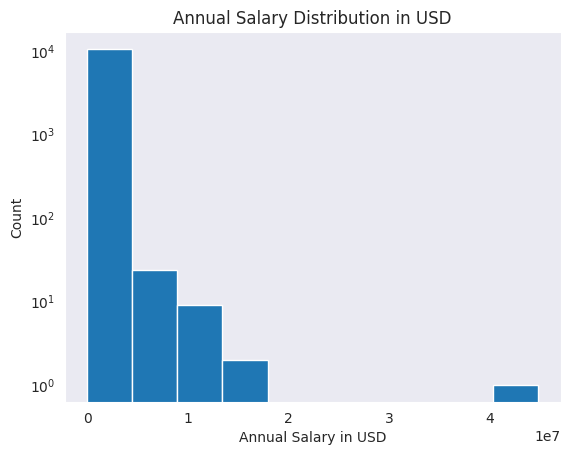

In [60]:
plt.hist(df.Annual_Salary)
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Annual Salary in USD')
plt.title('Annual Salary Distribution in USD');

#### Salary Distribution by Continent

North American developers are the most well-paid, followed by Oceania and Europe

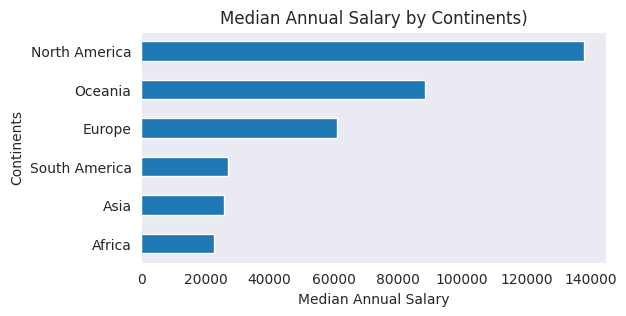

In [61]:
salo_sorted = salo.sort_values(ascending=True)
plt.figure(figsize=(6, 3))
salo_sorted.plot(kind='barh')
plt.ylabel('Continents')
plt.xlabel('Median Annual Salary')
plt.title('Median Annual Salary by Continents)');

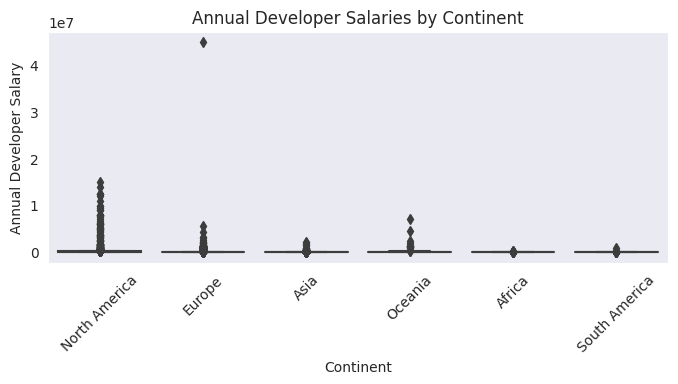

In [62]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(x='continents', y='Annual_Salary', data=df)
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Annual Developer Salary')
plt.title('Annual Developer Salaries by Continent')
plt.show()

#### Developer Tools By Salary

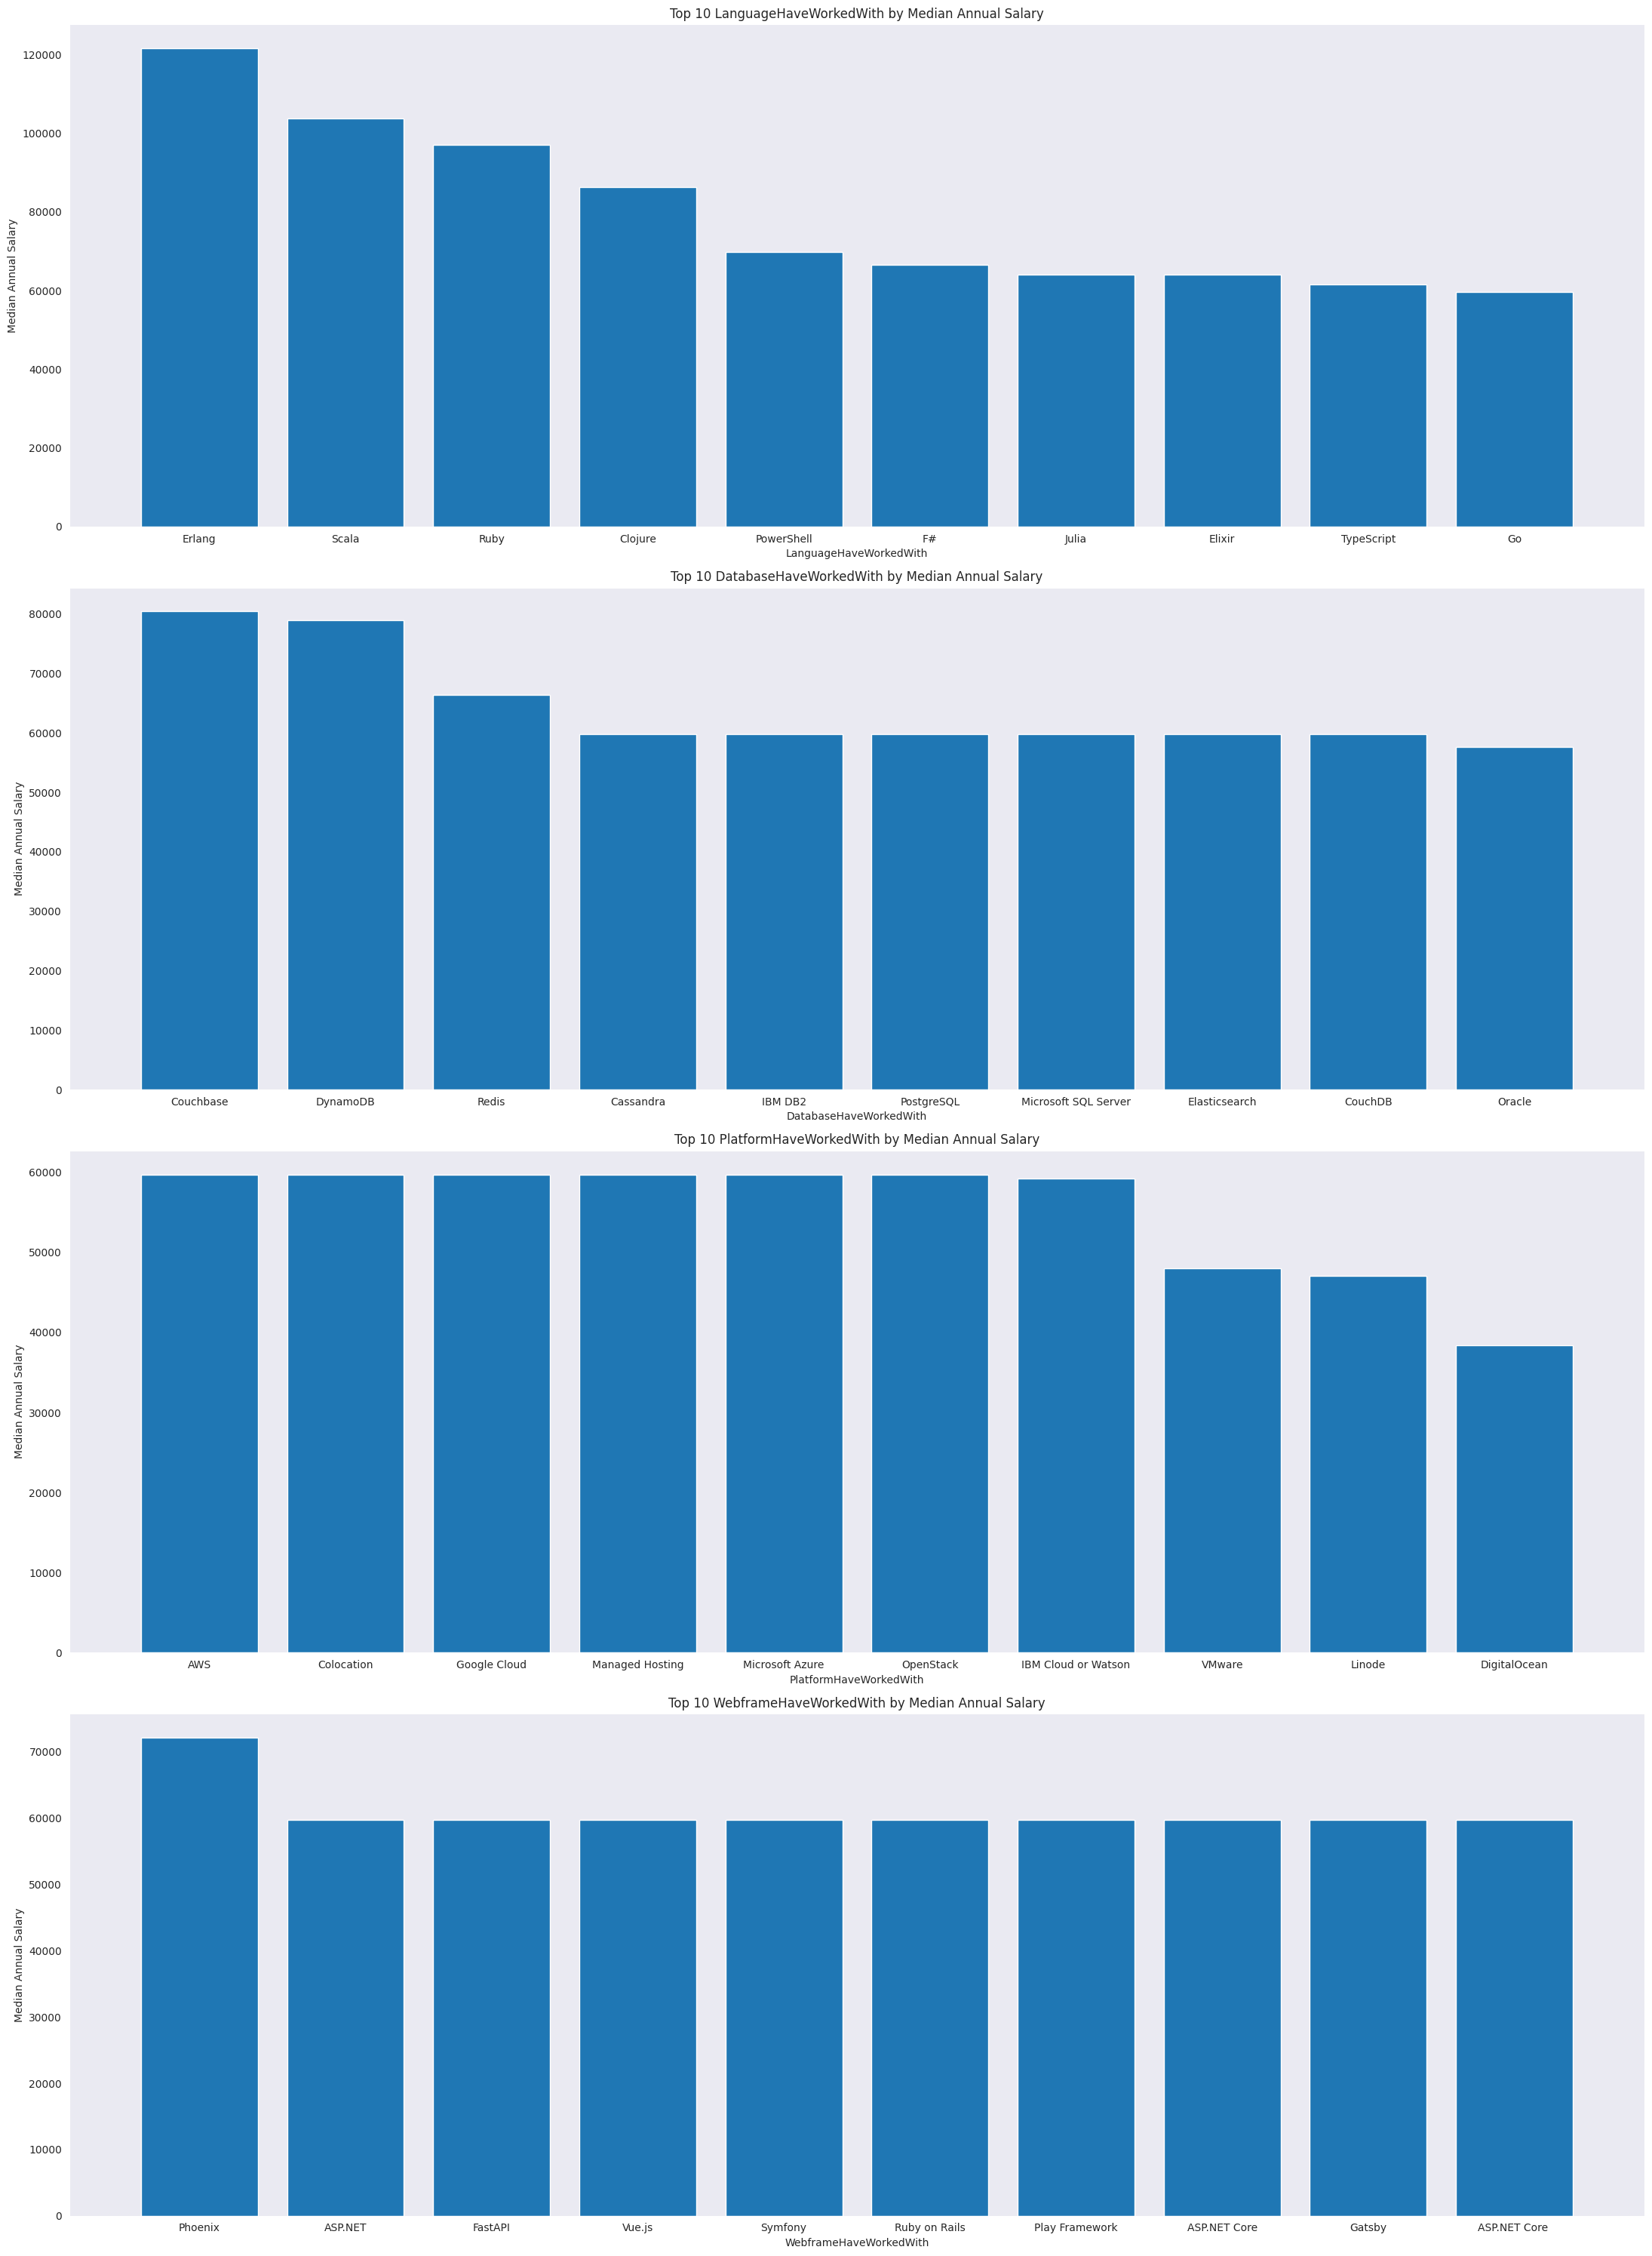

In [63]:
# Create subplots with 4 rows
fig, axes = plt.subplots(nrows=4, figsize=(22, 30))
# Define the columns to plot
columns_to_plot = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith']
# Iterate over the columns and create plots
for i, column in enumerate(columns_to_plot):
    # Group the data by column and calculate the average annual salary
    median_salary_by_column = df.groupby(column)['Annual_Salary'].median().reset_index()
    median_salary_by_column = median_salary_by_column.sort_values('Annual_Salary', ascending=False)
    top_10_categories = median_salary_by_column.head(10)
    # Create the bar plot for each column
    axes[i].bar(top_10_categories[column], top_10_categories['Annual_Salary'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Median Annual Salary')
    axes[i].set_title(f'Top 10 {column} by Median Annual Salary')
    #axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor', ha='right')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

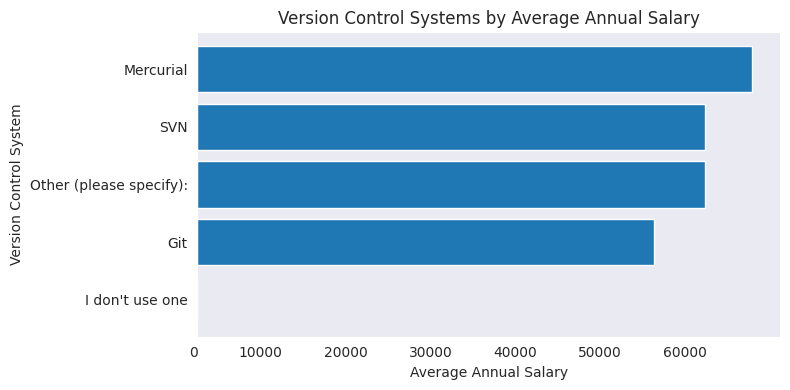

In [64]:
# Group the data by VersionControlSystem and calculate the median annual salary
average_salary_by_version_control = df.groupby('VersionControlSystem')['Annual_Salary'].median().reset_index()
average_salary_by_version_control = average_salary_by_version_control.sort_values('Annual_Salary', ascending=True)
# Create the vertical bar plot for VersionControlSystem
plt.figure(figsize=(8, 4))
plt.barh(average_salary_by_version_control['VersionControlSystem'], average_salary_by_version_control['Annual_Salary'])
plt.ylabel('Version Control System')
plt.xlabel('Average Annual Salary')
plt.title('Version Control Systems by Average Annual Salary')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## Multivariate Analysis

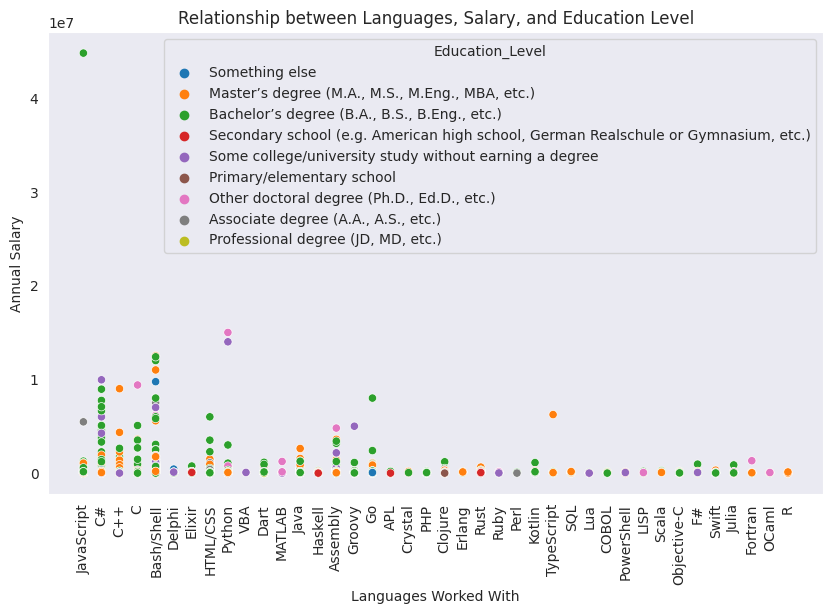

In [65]:
# Subset the relevant columns
subset_df = df[["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"]]

# Filter out rows with missing values in any of the selected columns
subset_df = subset_df.dropna(subset=["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x="LanguageHaveWorkedWith", y="Annual_Salary", hue="Education_Level")
plt.xticks(rotation=90)
plt.xlabel("Languages Worked With")
plt.ylabel("Annual Salary")
plt.title("Relationship between Languages, Salary, and Education Level")
plt.show()

# Data Preprocessing

### Initial Feature Selection & Data Encoding
Our data mostly contains categorical variables that need to be preprocessed via encoding to make it ready for modelling
Before encoding the data, based on domain knowledge, we will select the required features that are most likely to affect `Annual_Salary`. Below, `deletedf` (38 columns) shows the list of columns to be dropped, while `selectorf` (56 columns), shows the columns to be used in preprocessing

In [66]:
deletedf = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith',
'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'Proj_Mgmt_WantToWorkWith',
'Proj_Mgmt_SyncWantToWorkWith', 'Blockchain_Sentiment', 'New_Stack_Overfl_Sites', 'SOVisitFreq', 'SOAccount_Ownership',
'SOA_ParticipationFreq', 'Belong_SO_Comm', 'Participation_PDS', 'Contributor_or_Manager', 'Extroverted', 'Siloed_Teams',
'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support',
'SurveyLength', 'SurveyEase', 'Purchase_Research', 'OpSysPersonal_use', 'VersionControlSystem', 'VCInteraction',
'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_SyncHaveWorkedWith', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
'MentalHealth', 'continents', 'Learn_Code_Method', 'Learn_Code_Source', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OrgSize', 'Coding_Experience', 'Outofwork_Coding',
'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'ToolsTechHaveWorkedWith']

In [67]:
selectorf = ['Developer_Description', 'Employment_Status',
       'Remote_vs_Onsite', 'Outofwork_Coding', 'Education_Level',
       'Learn_Code_Method', 'Learn_Code_Source', 'Code_Certifications',
       'Coding_Experience', 'Pro_Experience', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'Country',
       'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith',
       'OpSysProfessional_use', 'OpSysPersonal_use', 'VersionControlSystem',
       'VCInteraction', 'Proj_Mgmt_HVWorkedWith',
       'Proj_Mgmt_SyncHaveWorkedWith',
       'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
       'MentalHealth', 'Annual_Salary',
       'continents']

In [68]:
print(len(deletedf), len(selectorf))

62 36


In [69]:
columns_to_binary_encode = ['Employment_Status', 'ProfessionalTech', 'OpSysPersonal_use', 'OpSysProfessional_use',
                            'Remote_vs_Onsite','Developer_Description', 'Outofwork_Coding', 'Learn_Code_Method',
                            'Learn_Code_Source', 'Code_Certifications', 'DevType', 'Purchase_Research', 'Country',
                            'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith',
                            'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
                            'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
                            'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
                            'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'VersionControlSystem',
                            'VCInteraction', 'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_WantToWorkWith',
                            'Proj_Mgmt_SyncHaveWorkedWith', 'Proj_Mgmt_SyncWantToWorkWith', 'New_Stack_Overfl_Sites',
                            'SOAccount_Ownership', 'Belong_SO_Comm', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                            'Disability', 'MentalHealth', 'Participation_PDS', 'Contributor_or_Manager',
                            'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support', 'continents' ]

In [70]:
columns_to_ordinal_encode = ['Education_Level', 'OrgSize', 'PurchaseInfluence', 'Blockchain_Sentiment', 'SOVisitFreq',
                             'SOA_ParticipationFreq', 'Age', 'Extroverted', 'Siloed_Teams', 'Information_Availability',
                             'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
                             'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos',
                             'TimeSearching_Answers', 'TimeAnswering', 'Onboarding_Duration', 'SurveyLength', 'SurveyEase']

In [71]:
numeric_cols = ['Coding_Experience', 'Pro_Experience','Annual_Salary']

In [72]:
columns_to_binary_encode_set = set(columns_to_binary_encode)
columns_to_ordinal_encode_set = set(columns_to_ordinal_encode)
deletedf_set = set(deletedf)

final_to_binary_encode = list(columns_to_binary_encode_set - deletedf_set)
final_to_ordinal_encode = list(columns_to_ordinal_encode_set - deletedf_set)

print(len(final_to_binary_encode))
print(len(final_to_ordinal_encode))
print(len(selectorf))

7
2
36


In [73]:
# final cols to work with
#final_to_binary_encode
#final_to_ordinal_encode
#numeric_cols


In [74]:
# drop work experience as its correlated to
# professional experience, hence duplication
df = dropping_columns(df, 'WorkExp')
df = dropping_columns(df, 'ResponseId')

In [75]:
# perform binary encoding
def perform_binary_encoding(df, columns):
    # Create a copy of the original DataFrame
    df_encoded = df.copy()
    # Perform Binary Encoding for each specified column
    for column in columns:
        binary_encoder = ce.BinaryEncoder(cols=[column])
        df_encoded = binary_encoder.fit_transform(df_encoded)
    return df_encoded
# Perform Binary Encoding
df_encoded_binary = perform_binary_encoding(df, final_to_binary_encode)
# Display the encoded dataframe
df_encoded_binary

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe
3,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0,Asia
4,0,0,1,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,132000.0,North America
5,0,1,0,0,0,1,0,0,1,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,0,1,0,0,0,0,1,0,1,0,...,Less than 15 minutes a day,Somewhat long,None of these,No,Yes,Yes,Appropriate in length,Neither easy nor difficult,69483.0,Europe
10577,0,0,1,0,0,0,1,0,0,1,...,30-60 minutes a day,Somewhat short,DevOps function,No,Yes,Yes,Appropriate in length,Easy,109500.0,North America
10578,0,0,1,0,0,0,1,0,1,0,...,15-30 minutes a day,Just right,DevOps function,Yes,No,No,Appropriate in length,Neither easy nor difficult,59720.0,Europe
10579,0,0,1,0,0,0,1,0,0,1,...,Less than 15 minutes a day,Just right,Not Answered,No,Yes,Yes,Appropriate in length,Easy,5481.0,Asia


In [76]:
# perform ordinal encoding
def perform_ordinal_encoding(df, columns):
    # Create a copy of the original DataFrame
    df_encod = df.copy()
    # Perform Ordinal Encoding for each specified column
    for column in columns:
        ordinal_encoder = ce.OrdinalEncoder(cols=[column])
        df_encod[column] = ordinal_encoder.fit_transform(df_encod[column])
    return df_encod
# Perform Ordinal Encoding
df_encod = perform_ordinal_encoding(df_encoded_binary, final_to_ordinal_encode)
# Display the encoded dataframe
df_encod.head(5)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe
3,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0,Asia
4,0,0,1,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,132000.0,North America
5,0,1,0,0,0,1,0,0,1,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe


In [77]:
# drop deleted columns
df_encod = dropping_columns(df_encod, deletedf)

# confirm no categorical variables
print(df_encod.select_dtypes(include='object').columns)
df_encod.head()

Index([], dtype='object')


,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,Country_5,Country_6,Country_7,LanguageHaveWorkedWith_0,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5,Annual_Salary
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,132000.0
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,40205.0
3,0,0,1,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,215232.0
4,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,132000.0
5,0,1,0,0,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0.0


In [78]:
corr = pd.DataFrame(abs(df_encod.corr()['Annual_Salary']).sort_values(ascending=False))
corr

,Annual_Salary
Annual_Salary,1.000000
Employment_Status_2,0.076517
PurchaseInfluence,0.072983
Employment_Status_3,0.072218
Country_6,0.067999
Pro_Experience,0.054938
Country_4,0.048483
Country_7,0.044531
Country_3,0.043693
DevType_3,0.042723


After reviewing the correlation of the variables, we narrowed down on the variables below by looking at the top correlations to `Annual_Salary`. We also used domain knowledge to include some columns like `Education_Level` and `Code_Certifications`.

In [79]:
selectfeature = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'OrgSize',
                 'Coding_Experience', 'Country', 'Pro_Experience', 'Developer_Description', 'Outofwork_Coding',
                 'Remote_vs_Onsite', 'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'DevType', 'LanguageHaveWorkedWith',
                 'ToolsTechHaveWorkedWith']

In [80]:
ordinalf = ['OrgSize', 'PurchaseInfluence', 'Education_Level']

In [81]:
binaryf = ['Code_Certifications', 'Employment_Status', 'Country', 'Developer_Description', 'Outofwork_Coding',
           'Remote_vs_Onsite', 'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'DevType', 'LanguageHaveWorkedWith',
           'ToolsTechHaveWorkedWith']

In [82]:
numericf = ['Coding_Experience', 'Pro_Experience']

In [83]:
print('data types for cols to ordinal encode')
print('_______________________________________\n')
print(df[ordinalf].dtypes)
print('\ndata types for cols to binary encode')
print('_______________________________________\n')
print(df[binaryf].dtypes)
print('\ndata types for remaining cols')
print('_______________________________________\n')
print(df[numericf].dtypes)


data types for cols to ordinal encode
_______________________________________

OrgSize              object
PurchaseInfluence    object
Education_Level      object
dtype: object

data types for cols to binary encode
_______________________________________

Code_Certifications        object
Employment_Status          object
Country                    object
Developer_Description      object
Outofwork_Coding           object
Remote_vs_Onsite           object
PlatformHaveWorkedWith     object
OpSysProfessional_use      object
DevType                    object
LanguageHaveWorkedWith     object
ToolsTechHaveWorkedWith    object
dtype: object

data types for remaining cols
_______________________________________

Coding_Experience    float64
Pro_Experience       float64
dtype: object


In [84]:
print(len(ordinalf)+len(binaryf)++len(numericf), '=', len(selectfeature))

16 = 16


#### Final List of Selected Features

In [85]:
finalf = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'Country', 'Pro_Experience',
'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith', 'Developer_Description']

finalbi = ['Code_Certifications', 'Employment_Status', 'Country', 'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith',
           'Developer_Description']
finalord = ['PurchaseInfluence', 'Education_Level']
finalnum = ['Pro_Experience']

In [86]:
print(len(finalf), '=', len(finalbi)+len(finalord)+len(finalnum))

10 = 10


#### Encode Categorical Variables of Final Features

In [87]:
df = dropping_columns(df, deletedf)
binary_df = perform_binary_encoding(df, finalbi)
ordinal_df = perform_ordinal_encoding(binary_df, finalord)
ordinal_df.head(2)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,Country_5,Country_6,Country_7,LanguageHaveWorkedWith_0,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5,Annual_Salary
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,132000.0
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,40205.0


### Modeling
Our objective is to be able to make developer salary predictions based on chosen features from our dataset. This task is to be achieved by evalauting different algorithmns and checking to see whether they meet our evaluation metrics.

We will be evaluating the following algorithmns :

- Multiple Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- AdaBoostRegressor

#### Baseline Model

In [88]:
# split the data to train & test

X = ordinal_df.drop('Annual_Salary', axis=1)
y = ordinal_df['Annual_Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Multiple Linear Regression
Regression models describe the relationship between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variables change. Multiple linear regression models allow us to add an indefinate number of variables

In [89]:
# create a pipeline

pipe_1 = Pipeline([('lr', LinearRegression())])

# fit the training data

pipe_1.fit(X_train, y_train)

#predict on test data

y_pred_1 = pipe_1.predict(X_test)

In [90]:
# function to print model metrics
def print_metrics(labels, preds):
    RMSE = round(mean_squared_error(labels, preds, squared = False ), 2)
    print(f"The model has a {RMSE} chance of making an error")
    MAE = round(mean_squared_error(labels, preds), 2)
    print(f"The model has a Mean Absolute Error of {MAE}")
    R_squared = round(r2_score(labels, preds), 2)
    print(f"The proportion of variance explained by our model is {R_squared}")

print_metrics(y_test,y_pred_1)

The model has a 375378.27 chance of making an error
The model has a Mean Absolute Error of 140908848757.54
The proportion of variance explained by our model is 0.03


### Decision Tree Regressor
This is a non-parametric supervised learning method used for regression, the goal is to create a model that predicts the value of a target variable by learning simple decison rules inferred from the data features

In [91]:
# create a pipeline

pipe_2 = Pipeline([('mms', MinMaxScaler()),
                   ('tree', DecisionTreeRegressor(random_state=42))])

# fit the training data

pipe_2.fit(X_train, y_train)

# prediction on test data

y_pred_2 = pipe_2.predict(X_test)

Model Evaluation

In [92]:
print_metrics(y_test, y_pred_2)

The model has a 738786.54 chance of making an error
The model has a Mean Absolute Error of 545805545290.31
The proportion of variance explained by our model is -2.77


Note : for a least-squares regression model, R-squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closed to 1 represent an (almost) perfect fit.

An R-squared of 0 would mean that we are explaining 0% of the variation in y. This is especially likely to occur if your dataset is not actually suited to linear regression modelling.

A negative R-squared would mean that your model is worse at explaining the variance than the baseline model. A negative R-squared with ordinary least squares linear regression means that something is wrong with the code, because a linear regression with an independent variable is built on top of an intercept-only model

Note : if you are doing a predictive modelling, you are most interested in making predictions about unknown values of y, then a higher R-squared is very important

Either way, R-squared provides important context for how you communicate about your model to others. If your model is only explaining a tiny amount of the variation in y , then there are potentially-important contributing factors that aren't included in your analysis.

Be sure to communicate your findings and their limitations clearly !

### Need to Change From Regression to Classification

The target variable seems to not be **fitting well on the predictive algorithms** therefore we will change the problem statement **to a classifcation problem**, we do this by determing an ordinal range of salaries salaries within the industry this would allow developers know the range of money to earn dependng on certain variables, it will also address skills gap within a certain salary categories while also helping HR in decision making. The deployment would look like a developer stating the specific skills they have then an output of a range of salaries is given.

For classification, we will try the models below:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Classifier

In [93]:
# create a new col with salary values as categories
# Define the bin ranges
bins = [0, 5000, 15000, 25000, 50000, 100000, 200000, float('inf')]

# Define the labels for each category
labels = ['Upto 5K', '5K-15K', '15K-30K', '30K-50K', '50K-100K', '100K-200K', 'Over 200K']

# Apply categorical encoding
ordinal_df.loc[:, 'year_salary'] = pd.cut(ordinal_df['Annual_Salary'], bins=bins, labels=labels, right=False)
ordinal_df.year_salary.value_counts()

50K-100K     3132
Upto 5K      2152
100K-200K    1622
15K-30K      1330
30K-50K      1242
Over 200K     631
5K-15K        375
Name: year_salary, dtype: int64

In [94]:
# drop annual salary, pro_experience col after the category feature engineering
ordinal_df = dropping_columns(ordinal_df, 'Annual_Salary')


From the new target categries above, we realised there was a class imbalance on some of the salary ranges. Below we correct for this using SMOTE

In [95]:
# address the class imbalance in the new salaries col
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X1, y1 = dropping_columns(ordinal_df, 'year_salary'), ordinal_df['year_salary']
imb = SMOTE(random_state=1)
X1res, y1res = imb.fit_resample(X1, y1)

# label encode y1res
le = LabelEncoder()
y1res_en = le.fit_transform(y1res)

In [96]:
X1res_train, X1res_test, y1res_train, y1res_test = train_test_split(X1res, y1res_en, test_size = 0.3, random_state = 1)

#### Logistic Regression

In [97]:

# create a pipeline
pipe_3 = Pipeline([('ss', StandardScaler()),
                   ('logreg', LogisticRegression(fit_intercept=True, C=1e12, solver = 'liblinear', dual=False))])

# fit the train data

pipe_3.fit(X1res_train, y1res_train)

# predict on test data

y_trainpred_3 = pipe_3.predict(X1res_train)
y_pred_3 = pipe_3.predict(X1res_test)

In [98]:
# function to print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted', zero_division=1)))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

    return None


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3)


training metrics
__________________________________
Precision Score: 0.5548541098432075
Recall Score: 0.5589078587254007
Accuracy Score: 0.5589078587254007
F1 Score: 0.5540918438101994

test metrics
___________________________________
Precision Score: 0.5464171190437012
Recall Score: 0.5507753116448768
Accuracy Score: 0.5507753116448768
F1 Score: 0.5457720191860668


In [99]:
# Hyperparameter tuning Logistic Regression using GridSearchCV
# Define the pipeline with hyperparameters to tune
pipe = Pipeline([('ss', StandardScaler()),
                 ('logreg', LogisticRegression())])
# Define the hyperparameter grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': [None, 'balanced']
}
# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X1res_train, y1res_train)
# Get the best hyperparameter values
print('best_params: ', grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best_params:  {'logreg__C': 1, 'logreg__class_weight': None, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
# run the tuned model
pipe_3t = Pipeline([('ss', StandardScaler()),
                   ('logreg', LogisticRegression(class_weight=None, C=1, solver='lbfgs' , penalty='l2'))])

# fit the train data
pipe_3t.fit(X1res_train, y1res_train)

# predict on test data

y_trainpred_3t = pipe_3t.predict(X1res_train)
y_pred_3t = pipe_3t.predict(X1res_test)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3t)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3t)

training metrics
__________________________________
Precision Score: 0.5577806256946561
Recall Score: 0.5606021112993614
Accuracy Score: 0.5606021112993614
F1 Score: 0.5577452391258523

test metrics
___________________________________
Precision Score: 0.5511539565577719
Recall Score: 0.5541197932502281
Accuracy Score: 0.5541197932502281
F1 Score: 0.5506979358238033


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### K-Nearest Neighbors **Rosemary**

In [101]:
# create a pipeline

pipe_4 = Pipeline([('ss', StandardScaler()),
                   ('neighbors', KNeighborsClassifier())])

# fit the training data

pipe_4.fit(X1res_train, y1res_train)

# predict on test data

y_pred_4 = pipe_4.predict(X1res_test)
y_trainpred_4 = pipe_4.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_4)


training metrics
__________________________________
Precision Score: 0.7640784015197658
Recall Score: 0.7634562752508797
Accuracy Score: 0.7634562752508797
F1 Score: 0.7615986490626029

test metrics
___________________________________
Precision Score: 0.6268817265203412
Recall Score: 0.6284584980237155
Accuracy Score: 0.6284584980237155
F1 Score: 0.6242495079632793


In [102]:
# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
# Create a KNN classifier
knn = KNeighborsClassifier()
# Create a GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(X1res_train, y1res_train)
# Get the best parameters
best_params = grid_search.best_params_
# Print the best parameters
print("Best parameters:", best_params)
# predict on test data
y_pred_g_4 = grid_search.predict(X1res_test)
y_trainpred_g_4 = grid_search.predict(X1res_train)
print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_g_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_g_4)

Best parameters: {'n_neighbors': 1}
training metrics
__________________________________
Precision Score: 0.9960921554067627
Recall Score: 0.9960901863677831
Accuracy Score: 0.9960901863677831
F1 Score: 0.9960893767970502

test metrics
___________________________________
Precision Score: 0.7675331992453712
Recall Score: 0.7757677105503192
Accuracy Score: 0.7757677105503192
F1 Score: 0.7648178596076777


#### Support Vector Classifier

In [103]:
# create a pipeline

#    pipe_5 = Pipeline([('ss', StandardScaler()),
#                      ('svc', SVC(kernel='poly'))])

    # fit the training data

 #   pipe_5.fit(X1res_train, y1res_train)

    # predict on test data

  #  y_pred_5 = pipe_5.predict(X1res_test)
   # y_trainpred_5 = pipe_5.predict(X1res_train)

    #print('training metrics')
    #print('__________________________________')
    #print_metrics(y1res_train, y_trainpred_5)
    #print('\ntest metrics')
    #print('___________________________________')
    #print_metrics(y1res_test, y_pred_5)


#### Decision Trees Classiffier **Samuel**

In [104]:
# create a pipeline
pipe_6 = Pipeline([('ss', StandardScaler()),
                   ('tree', DecisionTreeClassifier())])

# fit the training data

pipe_6.fit(X1res_train, y1res_train)

# predict on test data

y_pred_6 = pipe_6.predict(X1res_test)
y_trainpred_6 = pipe_6.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_6)


training metrics
__________________________________
Precision Score: 0.9963005221415298
Recall Score: 0.996285677049394
Accuracy Score: 0.996285677049394
F1 Score: 0.9962869399895471

test metrics
___________________________________
Precision Score: 0.7032274248255215
Recall Score: 0.7052295530556401
Accuracy Score: 0.7052295530556401
F1 Score: 0.7035300604158171


In [105]:
# Perform grid search with 5-fold cross-validation
param_grid = {
    'tree__max_depth': [3, 4, 5],  # Vary the maximum depth
    'tree__min_samples_leaf': [1, 2, 3],  # Vary the minimum number of samples required at leaf nodes
    'tree__max_features': [None, 'sqrt', 'log2'],  # Vary the maximum number of features to consider
    'tree__min_samples_split': [2, 5, 10]  # Vary the minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(pipe_6, param_grid, cv=5)
grid_search.fit(X1res_train, y1res_train)
# Get the best model
best_model = grid_search.best_estimator_
# Print the best parameter values
print('Best Parameter Values:')
print('______________________')
print(grid_search.best_params_)

Best Parameter Values:
______________________
{'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 5}


In [117]:
# run decision tree with tuned parameters
pipe_6t = Pipeline([('ss', StandardScaler()),
                   ('tree', DecisionTreeClassifier(max_depth = 5, max_features = None,
                                                   min_samples_leaf = 1, min_samples_split = 5))])
# fit the training data
pipe_6t.fit(X1res_train, y1res_train)
# predict on test data
y_pred_6t = pipe_6t.predict(X1res_test)
y_trainpred_6t = pipe_6t.predict(X1res_train)
print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6t)
print('\ntest metrics')
print('___________________________________')
print(print_metrics(y1res_test, y_pred_6t))

training metrics
__________________________________
Precision Score: 0.48477902109967447
Recall Score: 0.472566141013945
Accuracy Score: 0.472566141013945
F1 Score: 0.47449085664664115

test metrics
___________________________________
Precision Score: 0.4798273851062143
Recall Score: 0.4682274247491639
Accuracy Score: 0.4682274247491639
F1 Score: 0.46936877299975055
None


#### Random Forest Classier
We tried 2 options:
- random forest with default parameters
- random forest tuned hyper parameters

In [108]:
# create a pipeline
pipe_7 = Pipeline([('ss', StandardScaler()),
                   ('rand', RandomForestClassifier())])

# fit the training data

pipe_7.fit(X1res_train, y1res_train)

# predict on test data

y_pred_7 = pipe_7.predict(X1res_test)
y_trainpred_7 = pipe_7.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7)

training metrics
__________________________________
Precision Score: 0.9962910067543035
Recall Score: 0.996285677049394
Accuracy Score: 0.996285677049394
F1 Score: 0.9962861975379486

test metrics
___________________________________
Precision Score: 0.7819218026834928
Recall Score: 0.7820006080875647
Accuracy Score: 0.7820006080875647
F1 Score: 0.7811813133616436


In [109]:
# Hyperparameter tuning Random Forest
# Create a pipeline
pipe_7 = Pipeline([('ss', StandardScaler()),
                   ('rand', RandomForestClassifier(n_estimators=100,
                                                  max_depth=100,
                                                  min_samples_split=10,
                                                  min_samples_leaf=3,
                                                  max_features='sqrt'))])
# Fit the training data
pipe_7.fit(X1res_train, y1res_train)
# Predict on test data
y_pred_7t = pipe_7.predict(X1res_test)
y_trainpred_7t = pipe_7.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7t)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7t)

training metrics
__________________________________
Precision Score: 0.8614663736457228
Recall Score: 0.8608106346930796
Accuracy Score: 0.8608106346930796
F1 Score: 0.8602501491945691

test metrics
___________________________________
Precision Score: 0.7306280199723659
Recall Score: 0.7300091213134692
Accuracy Score: 0.7300091213134692
F1 Score: 0.7279963453555924


#### XG Boost

In [110]:
# create a pipeline
pipe_9 = Pipeline([('ss', StandardScaler()),
                   ('xgb', xgb.XGBClassifier())])

# fit the training data

pipe_9.fit(X1res_train, y1res_train)

# predict on test data

y_pred_9 = pipe_9.predict(X1res_test)
y_trainpred_9 = pipe_9.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_9)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_9)

training metrics
__________________________________
Precision Score: 0.8963798639498186
Recall Score: 0.8960641209435684
Accuracy Score: 0.8960641209435684
F1 Score: 0.8957929917981086

test metrics
___________________________________
Precision Score: 0.7516730959314406
Recall Score: 0.7522043174217087
Accuracy Score: 0.7522043174217087
F1 Score: 0.750775348687221


XG boost holds the most promise as it has the least gap betweeen training and test metrics, thus less prone to overfitting. It is thus the best candidate for hyperparameter tuning. Below we tune some hyperparameters and rerun the model

In [113]:
# identify XG boost hyperparameters
# for tuning

from sklearn.metrics import f1_score, make_scorer

xgb_params = [{
    "xgb__max_depth": [4, 5, 7],
    "xgb__learning_rate": [0.1, 0.01],
    "xgb__gamma": [0.25, 0.5],
    "xgb__reg_lambda": [0, 1, 10],
    "xgb__subsample": [0.8],
    "xgb__colsample_bytree": [0.5],
}]

# Creating a GridSearchCV with xgb_model as the estimator
gsv_xgb= GridSearchCV(estimator=pipe_9,
                       param_grid=xgb_params,
                       cv=5,
                       scoring='accuracy',
                       verbose=1)

# Fitting the model
gsv_xgb.fit(X1res_train, y1res_train)

# Get pest parametors
print('best params: ', gsv_xgb.best_params_)
print('best estimator: ', gsv_xgb.best_estimator_, '\n')

# predict on test data

#y_pred_9 = gsv_xgb.best_estimator_.predict(X1res_test)
#y_trainpred_9 = gsv_xgb.best_estimator_(X1res_train)

#print('training metrics')
#print('__________________________________')
#print_metrics(y1res_train, y_trainpred_9)
#print('\ntest metrics')
#print('___________________________________')
#print_metrics(y1res_test, y_pred_9)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best params:  {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.25, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}
best estimator:  Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.25, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
             

In [116]:
# create a pipeline
pipe_10 = Pipeline([('ss', StandardScaler()), ('xgb', xgb.XGBClassifier(
    colsample_bytree=0.5, gamma=0.25, learning_rate=0.1, max_depth=7,
    reg_lambda=2, subsample=0.8))])

# fit the training data

pipe_10.fit(X1res_train, y1res_train)

# predict on test data

y_pred_10 = pipe_10.predict(X1res_test)
y_trainpred_10 = pipe_10.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_10)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_10)

training metrics
__________________________________
Precision Score: 0.8104604715837554
Recall Score: 0.8101133845953343
Accuracy Score: 0.8101133845953343
F1 Score: 0.8090481230762395

test metrics
___________________________________
Precision Score: 0.7118005533911297
Recall Score: 0.7125266038309517
Accuracy Score: 0.7125266038309517
F1 Score: 0.7100093510179161


In [127]:
df[finalf]

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description
1,None of the Above,Something else,"Employed, full-time",None of the Above,Canada,7.0,Fully remote,None of the Above,JavaScript,I am a developer by profession
2,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",I have some influence,United Kingdom of Great Britain and Northern I...,5.0,"Hybrid (some remote, some in-person)",Data scientist or machine learning specialist,C#,"I am not primarily a developer, but I write co..."
3,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,Israel,17.0,Fully remote,"Developer, full-stack",C#,I am a developer by profession
4,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,United States of America,3.0,"Hybrid (some remote, some in-person)","Developer, front-end",C#,I am a developer by profession
5,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Student, full-time",None of the Above,Germany,7.0,None of the Above,None of the Above,C++,"I am not primarily a developer, but I write co..."
...,...,...,...,...,...,...,...,...,...,...
10576,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",I have little or no influence,Norway,5.0,"Hybrid (some remote, some in-person)",Academic researcher,Python,"I am not primarily a developer, but I write co..."
10577,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,United States of America,18.0,Fully remote,"Developer, front-end",HTML/CSS,I am a developer by profession
10578,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",None of the Above,Netherlands,7.0,"Hybrid (some remote, some in-person)","Developer, full-stack",C#,I am a developer by profession
10579,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have a great deal of influence,India,2.0,Fully remote,"Developer, mobile",HTML/CSS,I am a developer by profession


In [128]:
test1 = ['Udemy', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)	', 'Employed, full-time', 'I have some influence',
         'Canada', 7.0, 'Fully remote', 'Data scientist or machine learning specialist', 'JavaScript	', 'I am a developer by profession']

cols = list(df[finalf].columns)
testdf = pd.DataFrame([test1], columns=df[finalf].columns)
testdf

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description
0,Udemy,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)\t","Employed, full-time",I have some influence,Canada,7.0,Fully remote,Data scientist or machine learning specialist,JavaScript\t,I am a developer by profession


In [129]:
# encode test data
testdf_bi = perform_binary_encoding(testdf, finalbi)
testdf_ord = perform_ordinal_encoding(testdf_bi, finalord)
testdf_ord

,Code_Certifications_0,Education_Level,Employment_Status_0,PurchaseInfluence,Country_0,Pro_Experience,Remote_vs_Onsite_0,DevType_0,LanguageHaveWorkedWith_0,Developer_Description_0
0,1,1,1,1,1,7.0,1,1,1,1


In [139]:
# find cols in dataset, but not in testdf
others = []
for col in list(X1res_train.columns):
  if col not in list(testdf_ord.columns):
    others.append(col)

In [140]:
testdf_ord = testdf_ord.assign(**{column_name: 0 for column_name in others})
testdf_ord.head()


,Code_Certifications_0,Education_Level,Employment_Status_0,PurchaseInfluence,Country_0,Pro_Experience,Remote_vs_Onsite_0,DevType_0,LanguageHaveWorkedWith_0,Developer_Description_0,...,Country_3,Country_4,Country_5,Country_6,Country_7,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
0,1,1,1,1,1,7.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# reorder to match training data
testdf_ord = testdf_ord.reindex(columns=list(X1res_train.columns))

In [147]:
# Model simulation with Random Forest


out = pipe_7.predict(testdf_ord)
print('The predicted salary is: ', le.inverse_transform(out)[0])


The predicted salary is:  Upto 5K
